In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

/Users/thomas/.pyenv/versions/3.10.0/envs/soccer/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
from football_modelling.data import load_wyscout_match_data

data_df = load_wyscout_match_data(country = "Germany", raw= True)

In [4]:

#Identify the goals and add them to a column
shots=data_df[data_df['subEventName'].isin(['Shot','Free kick shot','Penalty'])]

In [5]:

shots=shots.assign(Goal = 0)
for i,shot in shots.iterrows():
    for shottags in shot['tags']:
            #Tags contain that its a goal
            if shottags['id']==101:
                shots.at[i,'Goal']=1
sum(shots['Goal'])
                
match_list=shots['matchId'].unique().tolist()
num_matches=len(match_list)
shots_in_match=[]
goals_in_match=[]
for match in match_list:
    shots_in_match.append(len(shots[shots['matchId']==match]))
    goals_in_match.append(len(shots[np.logical_and(shots['matchId']==match, (shots['Goal']==1))]))

In [7]:
shots_in_match

[33,
 24,
 17,
 20,
 32,
 22,
 24,
 19,
 20,
 21,
 30,
 29,
 23,
 18,
 22,
 37,
 18,
 31,
 27,
 17,
 31,
 25,
 21,
 21,
 24,
 26,
 25,
 36,
 26,
 18,
 17,
 26,
 34,
 25,
 27,
 16,
 23,
 16,
 35,
 18,
 23,
 24,
 20,
 37,
 23,
 25,
 24,
 21,
 27,
 29,
 27,
 12,
 20,
 22,
 37,
 25,
 29,
 35,
 23,
 22,
 23,
 23,
 16,
 25,
 21,
 34,
 11,
 29,
 27,
 21,
 21,
 39,
 22,
 30,
 28,
 28,
 16,
 31,
 22,
 25,
 29,
 25,
 32,
 18,
 28,
 19,
 21,
 13,
 22,
 22,
 24,
 27,
 32,
 22,
 29,
 21,
 24,
 22,
 30,
 23,
 18,
 24,
 26,
 19,
 24,
 21,
 26,
 18,
 23,
 23,
 26,
 32,
 29,
 23,
 26,
 29,
 28,
 39,
 20,
 22,
 30,
 26,
 29,
 24,
 26,
 31,
 21,
 25,
 30,
 24,
 17,
 22,
 13,
 22,
 26,
 32,
 18,
 33,
 28,
 22,
 20,
 25,
 28,
 30,
 24,
 27,
 25,
 20,
 21,
 20,
 26,
 35,
 22,
 25,
 22,
 27,
 23,
 14,
 26,
 25,
 34,
 19,
 26,
 27,
 18,
 20,
 33,
 16,
 19,
 28,
 27,
 27,
 15,
 22,
 20,
 22,
 19,
 12,
 21,
 28,
 32,
 19,
 26,
 24,
 23,
 23,
 27,
 26,
 28,
 21,
 14,
 32,
 30,
 25,
 20,
 24,
 25,
 19,
 17,
 21,


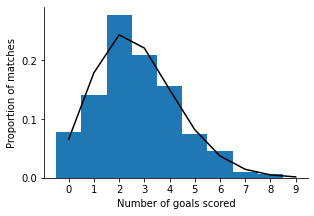

In [8]:
#Set up figure
fig=plt.figure()
from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax=fig.add_subplot(1,1,1)


#Make histogram of goals/shots
mean_goals=np.mean(goals_in_match)
goals_dist,goals_bins=np.histogram(goals_in_match, bins = np.arange(-0.5,10.5))
goals_dist=goals_dist/num_matches

#Make Poisson distribution
g=np.arange(0,10)
Poisson_g=np.zeros(10)
for i,k in enumerate(g):
    Poisson_g[i] = np.power(mean_goals,k)*np.exp(-mean_goals)/np.math.factorial(k)


#Plot data
plt.hist(g-0.5,9, weights=goals_dist)
plt.plot(g,Poisson_g, color='black')
ax.set_yticks(np.arange(0,0.3,0.1)) 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,10,1))
ax.set_ylabel('Proportion of matches')
ax.set_xlabel('Number of goals scored')
plt.show()    

#Save the figure to a pdf
fig.savefig('output/PoissonDistributionGoals.pdf' , dpi=None, bbox_inches="tight")

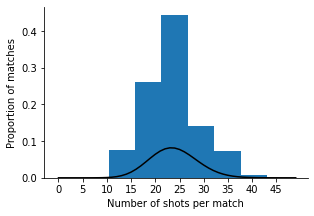

In [32]:
#Set up figure
fig=plt.figure()
from pylab import rcParams
rcParams['figure.figsize'] = 12/2.54, 8/2.54
ax=fig.add_subplot(1,1,1)

#Make histogram of shots
mean_shots=np.mean(shots_in_match)
shots_dist,shots_bins=np.histogram(shots_in_match, bins = np.arange(-0.5,50.5))
shots_dist=shots_dist/num_matches

#Make Poisson distribution
g=np.arange(0,50)
Poisson_g=np.zeros(50)
for i,k in enumerate(g):
    Poisson_g[i] = np.power(mean_shots,k)*np.exp(-mean_shots)/np.math.factorial(k)

#Plot data
plt.hist(g-0.5,9, weights=shots_dist)
plt.plot(g,Poisson_g, color='black')
ax.set_yticks(np.arange(0,0.5,0.1)) 
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_position('zero')    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0,50,5))
ax.set_ylabel('Proportion of matches')
ax.set_xlabel('Number of shots per match')
plt.show()    

#Save the figure to a pdf
fig.savefig('output/PoissonDistributionShots.pdf' , dpi=None, bbox_inches="tight")